# Jon Williamson

## Preprocessing




In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [23]:
df = pd.read_csv('svd_imputed_master_data.csv', index_col=0)
#df.fillna(0, inplace=True)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.410947,-1
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because no coach has ever been  an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 9-140 and 142-150 were normalized using a z-score transformation vs. all teams in the league in that year. This normalization  roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [25]:
df = df[df['Coach Tenure Class'] != -1]
# Get the target variable: Average 2-Year Win Percentage
X = df.iloc[:,2:-2]
y = df['Avg 2Y Win Pct']  # Changed from Coach Tenure Class to Avg 2Y Win Pct
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,47,0,0,0,0,12,0,0,0.438842,0.417777,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.000000
2,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.000000
3,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.000000
4,44,0,8,0,12,0,0,0,0.481277,0.481733,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.000000
5,25,0,0,0,0,0,0,0,0.418365,0.518853,...,0.375848,-0.430732,0.206445,-0.098774,0.128207,-0.372318,0.232741,-0.182801,0.195872,0.252686


In [26]:
y.head(5)

Unnamed: 0
1    0.267857
2    0.500000
3    0.281250
4    0.745455
5    0.200000
Name: Avg 2Y Win Pct, dtype: float64

The `Avg 2Y Win Pct` represents the average winning percentage over the coach's first two years with a team. This is a continuous variable ranging from 0.0 to 1.0.

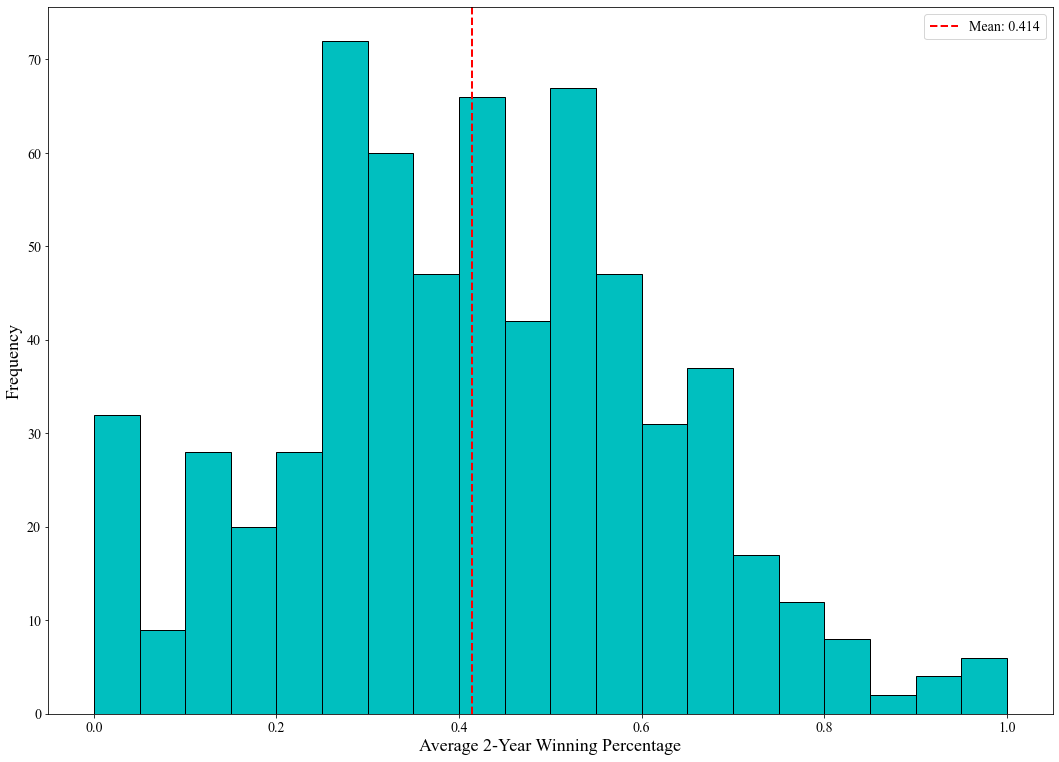

In [27]:
# Visualize the distribution of average 2-year winning percentage
raw_win_pct = y.values.T
raw_win_pct_mean = np.mean(raw_win_pct)
plt.hist(raw_win_pct, bins=20, color='c', edgecolor='k')
plt.axvline(raw_win_pct_mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {raw_win_pct_mean:.3f}')
plt.xlabel('Average 2-Year Winning Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The white boxes in the matrix show that that offensive and defensive coordinator metrics have no correlation. This is expected, as no coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features.

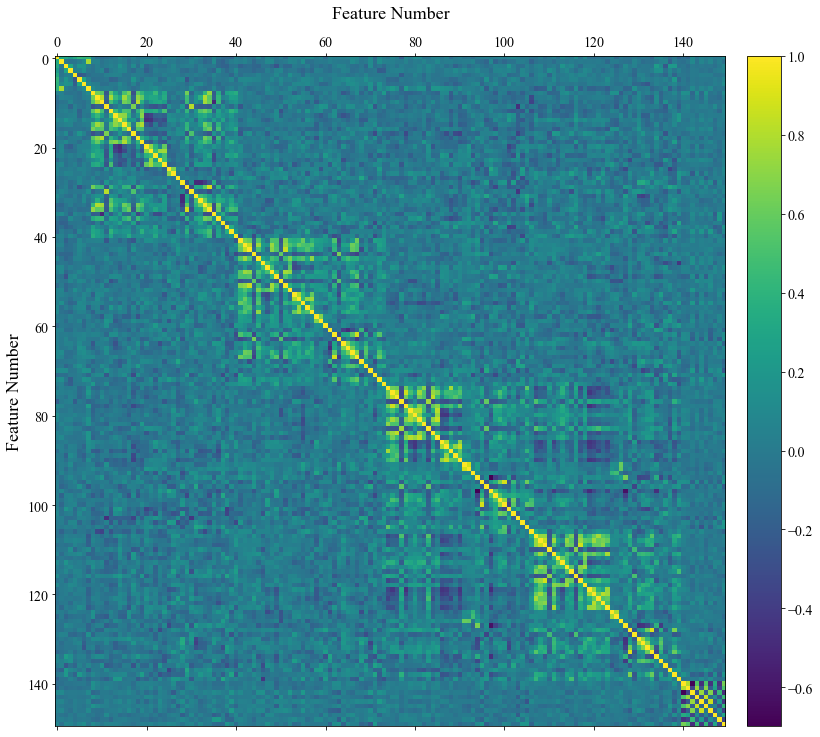

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
#plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
#plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-720)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, random_state=42)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, random_state=42)

In [31]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Model: XGBoost Regressor

Necessary Imports:

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

We will implement the XGBoost Regressor with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [34]:
# Hyperparameter grid for regression
xgbr_param_dict = {
    "n_estimators":     [50, 100, 150, 200],
    "learning_rate":    [.05, .1, .2, .3],
    "max_depth":        [3, 4, 5, 6],
    "gamma":            [0, .01, .1],
    "reg_lambda":       [0, .01, .1] 
}

xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    
    'train_rmse':   [],
    'test_rmse':    [],
    'train_r2':     [],
    'test_r2':      [],
    'train_mae':    [],
    'test_mae':     [],
    'importance':   []
}

default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',  # Changed from multi:softprob to regression objective
    'n_jobs':       1
}

num_of_folds = 10

# Use KFold instead of StratifiedKFold for regression
kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__ = mean_imputer.fit_transform(X_train_)
    X_test__ = mean_imputer.transform(X_test_)

    # Use neg_mean_squared_error for regression scoring
    model = GridSearchCV(XGBRegressor(**default_xgbr_params), param_grid=xgbr_param_dict, 
                        scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    # Get predictions
    tr_pred = best_model.predict(X_train__)
    te_pred = best_model.predict(X_test__)

    # Calculate regression metrics
    xgbr_result_dict['train_rmse'].append(np.sqrt(mean_squared_error(y_train_, tr_pred)))
    xgbr_result_dict['test_rmse'].append(np.sqrt(mean_squared_error(y_test_, te_pred)))
    xgbr_result_dict['train_r2'].append(r2_score(y_train_, tr_pred))
    xgbr_result_dict['test_r2'].append(r2_score(y_test_, te_pred))
    xgbr_result_dict['train_mae'].append(mean_absolute_error(y_train_, tr_pred))
    xgbr_result_dict['test_mae'].append(mean_absolute_error(y_test_, te_pred))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.2min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  3.1min finished


In [35]:
print('Cross-Validation Results:')
print('=' * 50)
print('Average Train RMSE: {:.4f}'.format(np.mean(xgbr_result_dict['train_rmse'])))
print('Average Test RMSE:  {:.4f}'.format(np.mean(xgbr_result_dict['test_rmse'])))
print('Average Train MAE:  {:.4f}'.format(np.mean(xgbr_result_dict['train_mae'])))
print('Average Test MAE:   {:.4f}'.format(np.mean(xgbr_result_dict['test_mae'])))
print('Average Train R²:   {:.4f}'.format(np.mean(xgbr_result_dict['train_r2'])))
print('Average Test R²:    {:.4f}'.format(np.mean(xgbr_result_dict['test_r2'])))

Cross-Validation Results:
Average Train RMSE: 0.0124
Average Test RMSE:  0.1085
Average Train MAE:  0.0098
Average Test MAE:   0.0785
Average Train R²:   0.9954
Average Test R²:    0.7018


In [36]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
        count += 1
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Feature 84, has an avg. importance of 0.0830 with a std. dev. of 0.0134.
Rank  2: Feature 18, has an avg. importance of 0.0665 with a std. dev. of 0.0202.
Rank  3: Feature 70, has an avg. importance of 0.0607 with a std. dev. of 0.0197.
Rank  4: Feature 121, has an avg. importance of 0.0577 with a std. dev. of 0.0284.
Rank  5: Feature 28, has an avg. importance of 0.0407 with a std. dev. of 0.0083.
Rank  6: Feature 125, has an avg. importance of 0.0346 with a std. dev. of 0.0150.
Rank  7: Feature 73, has an avg. importance of 0.0297 with a std. dev. of 0.0050.
Rank  8: Feature 61, has an avg. importance of 0.0297 with a std. dev. of 0.0134.
Rank  9: Feature 72, has an avg. importance of 0.0245 with a std. dev. of 0.0089.
Rank 10: Feature 59, has an avg. importance of 0.0223 with a std. dev. of 0.0069.
Rank 11: Feature 44, has an avg. importance of 0.0180 with a std. dev. of 0.0090.
Rank 12: Feature 128, has an avg. importance of 0.0166 with a std. dev. of 0.0056.
Rank 13: Feat

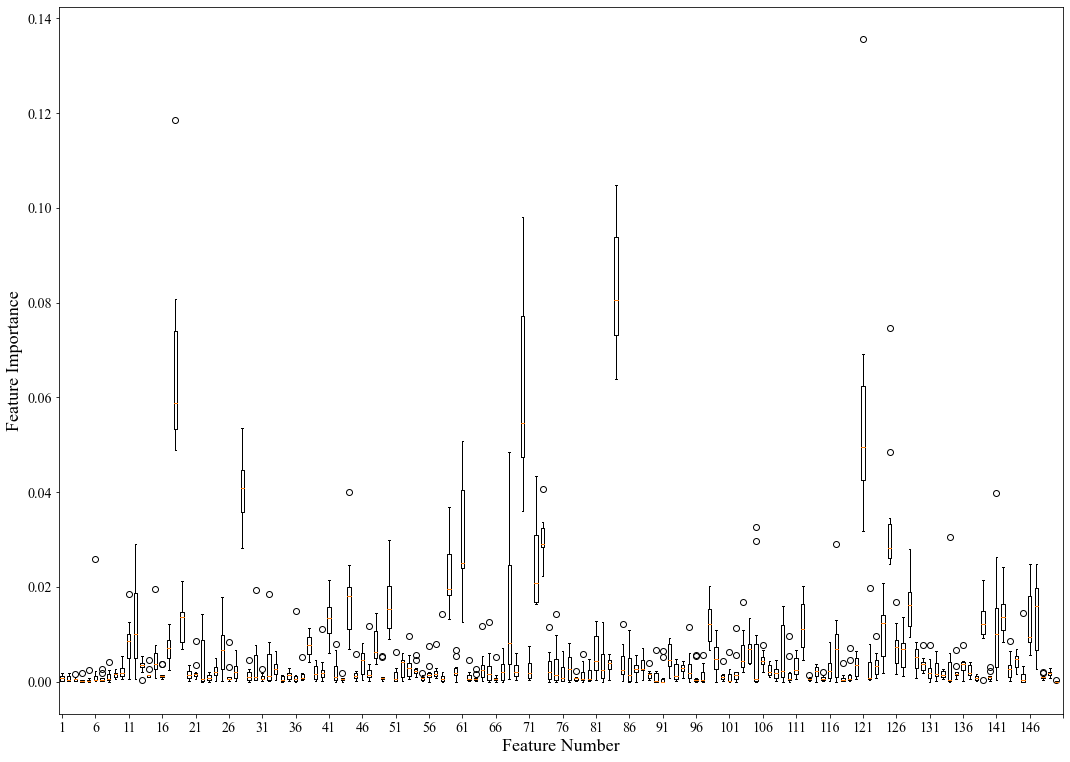

In [37]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=xgbr_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

The results show the feature importance from the XGBoost Regressor model. We can now evaluate the model's final performance on the hold-out test set.

The previously printed metrics show the performance of the XGBoost Regressor model. The R² value indicates how well the model explains the variance in the data, while RMSE and MAE show the average prediction errors. Before moving on, let's visualize the predictions of a model with the best average parameters on the held-out test set.

In [39]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print('Best parameters from cross-validation:')
    print(test_xgbr_best_params_dict)
    xgbr = XGBRegressor(**test_xgbr_best_params_dict).fit(X_train, y_train)
    plot_pred = xgbr.predict(X_test)

Best parameters from cross-validation:
{'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'gamma': 0, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'reg:squarederror', 'n_jobs': 1}


In [ ]:
#xgbr.save_model('XGBR_best_params_winpct')

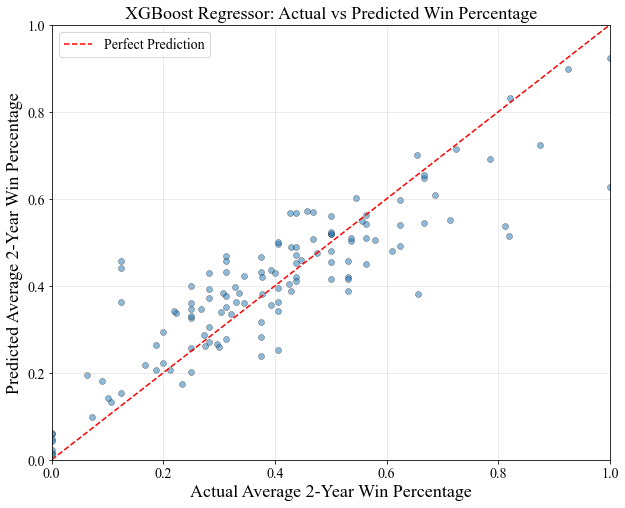

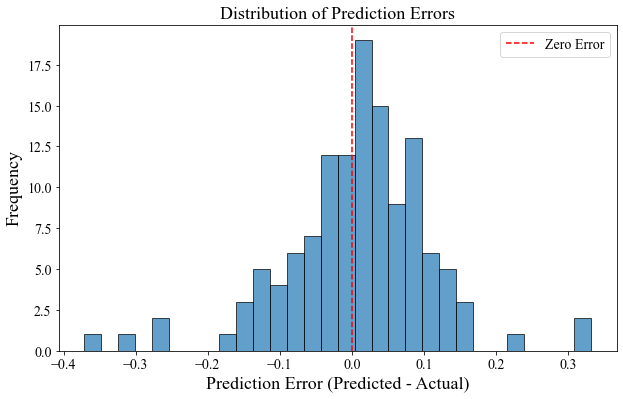

In [40]:
# Create scatter plot of actual vs predicted win percentages
plt.figure(figsize=(10, 8))
plt.scatter(y_test, plot_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Average 2-Year Win Percentage')
plt.ylabel('Predicted Average 2-Year Win Percentage')
plt.title('XGBoost Regressor: Actual vs Predicted Win Percentage')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Alternative visualization: prediction errors
plt.figure(figsize=(10, 6))
errors = plot_pred - y_test
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.legend()
plt.show()

In [41]:
print('Hold-out Test Set Performance:')
print('=' * 50)
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, plot_pred))))
print('MAE:  {:.4f}'.format(mean_absolute_error(y_test, plot_pred)))
print('R²:   {:.4f}'.format(r2_score(y_test, plot_pred)))

Hold-out Test Set Performance:
RMSE: 0.1023
MAE:  0.0747
R²:   0.7695


The XGBoost Regressor shows promising performance in predicting the average 2-year winning percentage for NFL coaches. The model captures the relationship between the input features and coaching success as measured by win percentage.

In [42]:
# Load data for recent coach predictions
df_ = pd.read_csv('svd_imputed_master_data.csv', index_col=0)
#df_.fillna(0, inplace=True)
df_ = df_[df_['Coach Tenure Class'] == -1]
print(f"Number of recent coaches to predict: {df_.shape[0]}")
df_.head(10)

Number of recent coaches to predict: 21


,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.410947,-1
31,Ben Johnson,2025,39,0,1,0,0,4,3,0,...,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0,0.072086,-1
69,Brian Callahan,2024,40,0,0,0,0,3,5,0,...,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0,0.176471,-1
70,Brian Daboll,2022,47,0,0,1,0,10,8,0,...,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0,0.455882,-1
72,Brian Schottenheimer,2025,52,0,2,1,0,8,14,0,...,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0,0.255720,-1
133,Dan Quinn,2024,54,1,6,3,0,8,5,6,...,1.188696,-0.407393,0.337047,-0.828606,0.628450,-0.898061,0.866486,0.0,0.705882,-1
139,Dave Canales,2024,43,0,3,0,0,6,1,0,...,0.506368,-1.477273,-0.444299,-1.201064,-0.470088,-1.654772,-0.411087,0.0,0.294118,-1
145,DeMeco Ryans,2023,39,0,0,0,0,3,2,0,...,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0,0.588235,-1
320,Jim Harbaugh,2024,61,1,0,0,16,2,0,4,...,0.437967,0.316324,0.704380,-0.259284,1.062612,0.009139,-0.609940,1.0,0.647059,-1


In [43]:
X_ = df_.iloc[:,2:-2]
y_ = df_['Avg 2Y Win Pct']  # Get actual win percentages for comparison
X_.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,53,0,0,0,0,5,4,0,0.902133,0.363901,...,0.352941,-1.060228,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0
31,39,0,1,0,0,4,3,0,1.649025,1.737787,...,0.352941,-0.594120,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0
69,40,0,0,0,0,3,5,0,-0.183835,-0.355235,...,0.382353,-1.061871,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0
70,47,0,0,1,0,10,8,0,-0.539089,-0.515554,...,0.305147,-1.745387,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0
72,52,0,2,1,0,8,14,0,0.143263,-0.183343,...,0.558824,0.722236,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0


In [44]:
# Train final model on all training data for recent coach predictions
from xgboost import XGBRegressor

# Use best parameters from cross-validation
best_xgbr_param_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}

default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',
    'n_jobs':       1
}

best_xgbr_param_dict.update(default_xgbr_params)
print('Final model parameters:')
print(best_xgbr_param_dict)

# Train model and make predictions
xgbr_final = XGBRegressor(**best_xgbr_param_dict).fit(X_train, y_train)
win_pct_predictions = xgbr_final.predict(X_)

Final model parameters:
{'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'gamma': 0, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'reg:squarederror', 'n_jobs': 1}


In [45]:
# Display predictions for recent coaches (hired 2022 or later)
print("\n" + "="*80)
print("PREDICTED AVERAGE 2-YEAR WIN PERCENTAGES FOR RECENT COACHES")
print("="*80)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Coach Name': df_['Coach Name'].values,
    'Year': df_['Year'].values,
    'Actual Win %': y_.values,
    'Predicted Win %': win_pct_predictions
})

# Sort by predicted win percentage descending
results_df = results_df.sort_values('Predicted Win %', ascending=False)

# Filter for coaches hired 2022 or later
recent_coaches = results_df[results_df['Year'] >= 2022]

print(f"\nCoaches hired 2022 or later (sorted by predicted win %):\n")
for idx, row in recent_coaches.iterrows():
    actual = row['Actual Win %']
    actual_str = f"{actual:.3f}" if actual > 0 else "TBD"
    print(f"{row['Coach Name']:<22} ({row['Year']})  Predicted: {row['Predicted Win %']:.3f}  Actual: {actual_str}")

# Overall statistics
print(f"\n" + "-"*80)
print(f"Average predicted win % for recent hires: {recent_coaches['Predicted Win %'].mean():.3f}")
print(f"Std. dev. of predictions: {recent_coaches['Predicted Win %'].std():.3f}")
print(f"Range: {recent_coaches['Predicted Win %'].min():.3f} - {recent_coaches['Predicted Win %'].max():.3f}")


PREDICTED AVERAGE 2-YEAR WIN PERCENTAGES FOR RECENT COACHES

Coaches hired 2022 or later (sorted by predicted win %):

Todd Bowles            (2022)  Predicted: 0.619  Actual: 0.500
Mike Macdonald         (2024)  Predicted: 0.566  Actual: 0.588
DeMeco Ryans           (2023)  Predicted: 0.534  Actual: 0.588
Dan Quinn              (2024)  Predicted: 0.515  Actual: 0.706
Dave Canales           (2024)  Predicted: 0.513  Actual: 0.294
Shane Steichen         (2023)  Predicted: 0.505  Actual: 0.500
Sean Payton            (2023)  Predicted: 0.502  Actual: 0.529
Jim Harbaugh           (2024)  Predicted: 0.452  Actual: 0.647
Mike Vrabel            (2025)  Predicted: 0.450  Actual: 0.135
Kevin O'Connell        (2022)  Predicted: 0.424  Actual: 0.588
Raheem Morris          (2024)  Predicted: 0.424  Actual: 0.471
Pete Carroll           (2025)  Predicted: 0.414  Actual: 0.113
Kellen Moore           (2025)  Predicted: 0.412  Actual: 0.496
Brian Daboll           (2022)  Predicted: 0.407  Actual: 0.45

## Baseline Model Comparison

To understand how well our XGBoost model performs, let's compare it against a simple baseline model that always predicts the mean win percentage from the training set. This gives us context for our model's predictive power.

MODEL PERFORMANCE COMPARISON

Training set mean win percentage: 0.4183
(Baseline always predicts this value)

----------------------------------------
BASELINE MODEL (Always Predict Mean):
----------------------------------------
RMSE: 0.2143
MAE:  0.1676
R²:   -0.0109

----------------------------------------
XGBOOST REGRESSOR MODEL:
----------------------------------------
RMSE: 0.1023
MAE:  0.0747
R²:   0.7695

----------------------------------------
IMPROVEMENT OVER BASELINE:
----------------------------------------
RMSE Reduction: 0.1120 (52.2% improvement)
MAE Reduction:  0.0929 (55.4% improvement)
R² Improvement: 0.7804 (from -0.0109 to 0.7695)


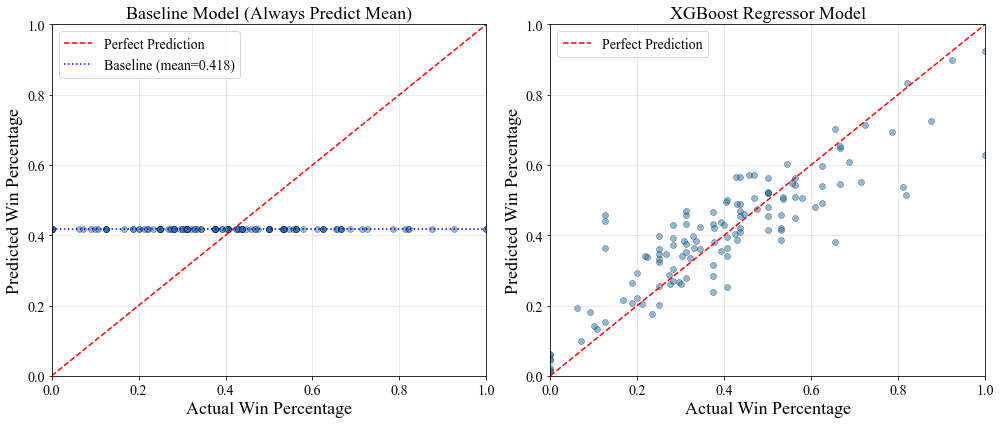

In [46]:
# Calculate baseline model performance (always predict mean)
train_mean = y_train.mean()
baseline_predictions = np.full(len(y_test), train_mean)

# Calculate baseline metrics
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

# Calculate our model's metrics for comparison
model_rmse = np.sqrt(mean_squared_error(y_test, plot_pred))
model_mae = mean_absolute_error(y_test, plot_pred)
model_r2 = r2_score(y_test, plot_pred)

# Display comparison
print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(f"\nTraining set mean win percentage: {train_mean:.4f}")
print(f"(Baseline always predicts this value)\n")

print("-" * 40)
print("BASELINE MODEL (Always Predict Mean):")
print("-" * 40)
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE:  {baseline_mae:.4f}")
print(f"R²:   {baseline_r2:.4f}")

print("\n" + "-" * 40)
print("XGBOOST REGRESSOR MODEL:")
print("-" * 40)
print(f"RMSE: {model_rmse:.4f}")
print(f"MAE:  {model_mae:.4f}")
print(f"R²:   {model_r2:.4f}")

print("\n" + "-" * 40)
print("IMPROVEMENT OVER BASELINE:")
print("-" * 40)
print(f"RMSE Reduction: {baseline_rmse - model_rmse:.4f} ({(baseline_rmse - model_rmse)/baseline_rmse * 100:.1f}% improvement)")
print(f"MAE Reduction:  {baseline_mae - model_mae:.4f} ({(baseline_mae - model_mae)/baseline_mae * 100:.1f}% improvement)")
print(f"R² Improvement: {model_r2 - baseline_r2:.4f} (from {baseline_r2:.4f} to {model_r2:.4f})")

# Visualize baseline vs model predictions
plt.figure(figsize=(14, 6))

# Subplot 1: Baseline predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, baseline_predictions, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.axhline(y=train_mean, color='b', linestyle=':', label=f'Baseline (mean={train_mean:.3f})')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Baseline Model (Always Predict Mean)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: XGBoost predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, plot_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('XGBoost Regressor Model')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()